In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-2025-fall-12345678/hts_2025_revision_19_csv.csv') # load the data from s3
df.head() #show the top 5 rows





,HTS Number,Indent,Description,Unit of Quantity,General Rate of Duty,Special Rate of Duty,Column 2 Rate of Duty,Quota Quantity,Additional Duties
0,0101,0,"Live horses, asses, mules and hinnies:",NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,Horses:,NaN,NaN,NaN,NaN,NaN,NaN
2,0101.21.00,2,Purebred breeding animals,NaN,Free,NaN,Free,NaN,NaN
3,0101.21.00.10,3,Males,"[""No.""]",NaN,NaN,NaN,NaN,NaN
4,0101.21.00.20,3,Females,"[""No.""]",NaN,NaN,NaN,NaN,NaN


In [2]:
df[['HTS Number']] # keep specific columns 


,HTS Number
0,0101
1,NaN
2,0101.21.00
3,0101.21.00.10
4,0101.21.00.20
...,...
36082,9922.52.09
36083,9922.52.10
36084,NaN
36085,9922.52.11


In [3]:
df.shape

(36087, 9)

In [4]:
#my dataset has (36087) rows 

In [5]:
df.head()
#my data has more aquantities that say NaN then Free, being shwon in the first 5 rows, 36087 rows x 9 columns, numeric and text  

,HTS Number,Indent,Description,Unit of Quantity,General Rate of Duty,Special Rate of Duty,Column 2 Rate of Duty,Quota Quantity,Additional Duties
0,0101,0,"Live horses, asses, mules and hinnies:",NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,Horses:,NaN,NaN,NaN,NaN,NaN,NaN
2,0101.21.00,2,Purebred breeding animals,NaN,Free,NaN,Free,NaN,NaN
3,0101.21.00.10,3,Males,"[""No.""]",NaN,NaN,NaN,NaN,NaN
4,0101.21.00.20,3,Females,"[""No.""]",NaN,NaN,NaN,NaN,NaN


In [6]:
df.info() #check for data struture 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36087 entries, 0 to 36086
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HTS Number             30054 non-null  object 
 1   Indent                 36087 non-null  int64  
 2   Description            36087 non-null  object 
 3   Unit of Quantity       19758 non-null  object 
 4   General Rate of Duty   13783 non-null  object 
 5   Special Rate of Duty   10033 non-null  object 
 6   Column 2 Rate of Duty  13424 non-null  object 
 7   Quota Quantity         0 non-null      float64
 8   Additional Duties      512 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.5+ MB


In [7]:
df.isnull().sum() #check for missing values 

HTS Number                6033
Indent                       0
Description                  0
Unit of Quantity         16329
General Rate of Duty     22304
Special Rate of Duty     26054
Column 2 Rate of Duty    22663
Quota Quantity           36087
Additional Duties        35575
dtype: int64

The code shows the null values are at indent and description. I seleccted HTS number to show for colums, anf filtered them by count, length, dtype

In [8]:
df['HTS Number'].value_counts() 

HTS Number
9922.52.12       1
0101             1
0101.21.00       1
0101.21.00.10    1
0101.21.00.20    1
                ..
0101.90.30.00    1
0101.90.40.00    1
0102             1
0102.21.00       1
0102.21.00.10    1
Name: count, Length: 30054, dtype: int64

<Axes: xlabel='HTS Number'>

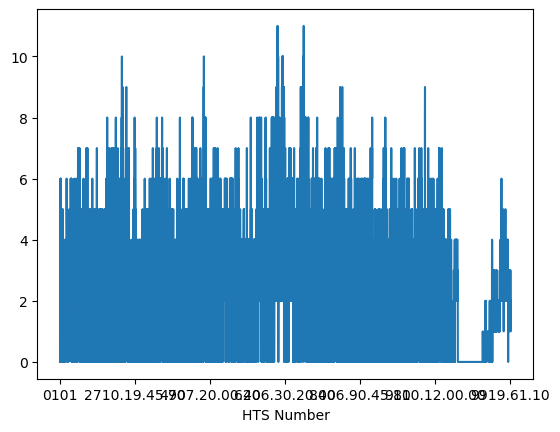

In [22]:
sum_cases_by_percent = df.groupby('HTS Number')['Indent'].sum() #aggregate the total case number per day
sum_cases_by_percent.head()
sum_cases_by_percent.plot() #use a line chart to show the result

the plot chart. shows the total indent values for each HTS number. The peaks shwo the highest numbers and the drops are dramatic. 

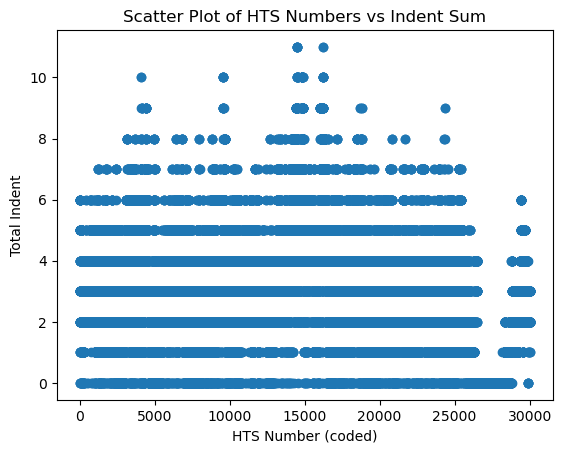

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Group and sum 'Indent' values by HTS Number
sum_cases_by_percent = df.groupby('HTS Number')['Indent'].sum().reset_index()

# Convert HTS Number into categorical codes (so it can be plotted on X-axis)
sum_cases_by_percent['HTS_code_num'] = sum_cases_by_percent['HTS Number'].astype('category').cat.codes

# Scatter plot
plt.scatter(sum_cases_by_percent['HTS_code_num'], sum_cases_by_percent['Indent'])
plt.xlabel("HTS Number (coded)")
plt.ylabel("Total Indent")
plt.title("Scatter Plot of HTS Numbers vs Indent Sum")
plt.show()


The x-axis is a coded version of those HTS Numbers. The y-axis shows the Indent value. shows different tarrif codes spread between different levels. 